In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
def mae(y, y_pred):
    return ((y - y_pred).abs()).mean()
def mape(y, y_pred):
    return ((y - y_pred).abs() / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Naïve forecasting

Naïve forecasting is a simple time series forecasting method that assumes the future values of a time series will be the same as the most recent observed value. In other words, the method predicts that the next data point in the series will be equal to the most recent data point.

This method is called "naïve" because it ignores any patterns or trends in the data and assumes that the future will be exactly the same as the present.

Naïve forecasting is often used as a baseline model for comparison with more advanced forecasting methods. It can also be useful when the data is highly irregular or when other forecasting methods are not available.

To use naïve forecasting, you simply take the last observed value in the time series and use it as the forecast for the next period. This can be represented mathematically as:

Ŷ(t+1) = Y(t)

Where Ŷ(t+1) is the forecast for the next period, and Y(t) is the last observed value in the series

MAE: 25.86013986013986
RMSE: 33.710408012832005
MAPE: 9.019447701311428


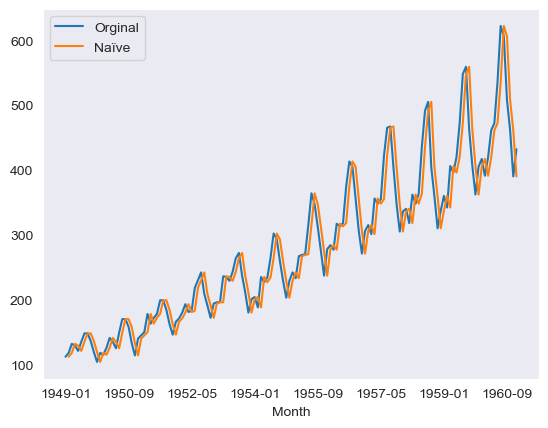

In [6]:
df = pd.read_csv('AirPassengers.csv')

# Set the index of the DataFrame to the date column
df.set_index('Month', inplace=True)

# Use the last observed value as the forecast for the next period
df['naive_forecast'] = df['#Passengers'].shift(1)
# Plot visulization
df['#Passengers'].plot()
df['naive_forecast'].plot()
plt.legend(['Orginal', 'Naïve'])

# print evaltion 
evaluate(df['#Passengers'], df['naive_forecast'])

Naive forecasting assumes that there is no underlying trend or seasonality in the data and can be useful as a baseline for comparison with more complex forecasting methods.



Compared to naive forecasting, WMA does take into account past observations (according to the window size) with weights and not all past observation with the same weight and can capture some degree of trend and seasonality. However, naive forecasting assumes that the future values will be the same as the most recent observed value, which can be problematic if the underlying data-generating process is subject to sudden changes or fluctuations. This explains the better performance of the naive model in our data is it dosen't has any sudden changes or fluctuations.